In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import torch
print("CUDA Available:", torch.cuda.is_available())
print("GPU Name:", torch.cuda.get_device_name(0))

CUDA Available: True
GPU Name: Tesla T4


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
import joblib
from sklearn.linear_model import LogisticRegression

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Meat Quality Dataset (Logged)/Final_Dataset.csv')

numeric_columns = ['MQ9', 'MQ136', 'MQ135', 'MQ4', 'MQ2', 'MQ137', 'Temperature', 'Humidity']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

print(data.dtypes)

# 'MQ9', 'MQ136', 'MQ135', 'MQ4', 'MQ2', 'MQ137', 'Temperature', 'Humidity'
X = data.drop(columns=['Label'])
y = data['Label']

feature_names = X.columns

# data info
print(data.head())
print(data.info())
print(data.describe())

<ipython-input-4-a5ad77c46797>:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/Meat Quality Dataset (Logged)/Final_Dataset.csv')


MQ9            float64
MQ136          float64
MQ135          float64
MQ4            float64
MQ2            float64
MQ137          float64
Temperature    float64
Humidity       float64
Label           object
dtype: object
    MQ9  MQ136  MQ135   MQ4     MQ2  MQ137  Temperature  Humidity      Label
0  77.0  181.0   35.0  33.0  1023.0   35.0         27.2      79.2  Excellent
1  76.0  182.0   34.0  34.0   990.0   33.0         27.2      79.2  Excellent
2  75.0  182.0   35.0  34.0   983.0   30.0         27.3      79.2  Excellent
3  75.0  180.0   34.0  33.0  1023.0   31.0         27.3      79.2  Excellent
4  77.0  179.0   35.0  35.0  1023.0   33.0         27.3      79.0  Excellent
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104823 entries, 0 to 104822
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   MQ9          104821 non-null  float64
 1   MQ136        104821 non-null  float64
 2   MQ135        104821 non-null  

In [ ]:
print(X.head())
print(X.info())
print(X.describe())

    MQ9  MQ136  MQ135   MQ4     MQ2  MQ137  Temperature  Humidity
0  77.0  181.0   35.0  33.0  1023.0   35.0         27.2      79.2
1  76.0  182.0   34.0  34.0   990.0   33.0         27.2      79.2
2  75.0  182.0   35.0  34.0   983.0   30.0         27.3      79.2
3  75.0  180.0   34.0  33.0  1023.0   31.0         27.3      79.2
4  77.0  179.0   35.0  35.0  1023.0   33.0         27.3      79.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104823 entries, 0 to 104822
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   MQ9          104821 non-null  float64
 1   MQ136        104821 non-null  float64
 2   MQ135        104821 non-null  float64
 3   MQ4          104821 non-null  float64
 4   MQ2          104821 non-null  float64
 5   MQ137        104821 non-null  float64
 6   Temperature  104821 non-null  float64
 7   Humidity     104821 non-null  float64
dtypes: float64(8)
memory usage: 6.4 MB
None
                 MQ

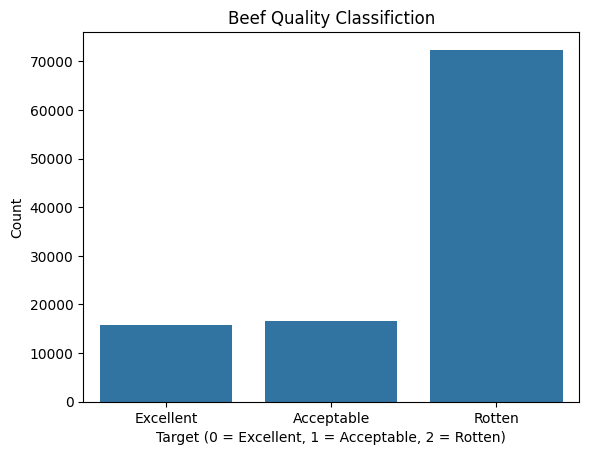

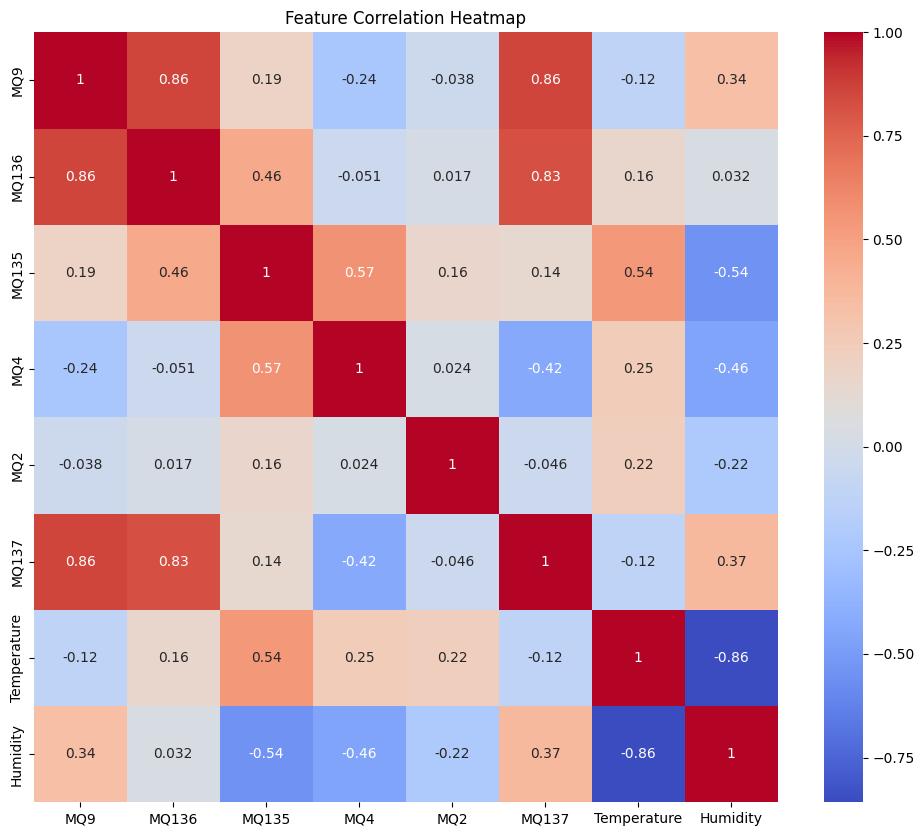

In [ ]:
# Countplot
sns.countplot(x='Label', data=data)
plt.title('Beef Quality Classifiction')
plt.xlabel('Target (0 = Excellent, 1 = Acceptable, 2 = Rotten)')
plt.ylabel('Count')
plt.show()

# Convert numeric columns to proper dtype
numeric_data = data.drop(columns=["Label"]).astype(float)

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_data.corr(), cmap="coolwarm", annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
print(X)
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

[[0.16712329 0.14769976 0.04761905 ... 0.05947955 0.07638889 0.88207547]
 [0.16438356 0.15012107 0.03809524 ... 0.05204461 0.07638889 0.88207547]
 [0.16164384 0.15012107 0.04761905 ... 0.04089219 0.08333333 0.88207547]
 ...
 [0.0109589  0.10895884 0.11428571 ... 0.05947955 0.78472222 0.08254717]
 [0.01369863 0.11138015 0.12380952 ... 0.05204461 0.78472222 0.08254717]
 [0.01369863 0.11138015 0.12380952 ... 0.06319703 0.78472222 0.08254717]]
[[ 3.70833909 -0.2243413  -2.42780625 ... -0.619051   -4.79767573
   5.07262647]
 [ 3.62942091 -0.1979883  -2.79871844 ... -0.74020513 -4.79767573
   5.07262647]
 [ 3.55050273 -0.1979883  -2.42780625 ... -0.92193632 -4.74990824
   5.07262647]
 ...
 [-0.78999718 -0.64598932  0.16857908 ... -0.619051    0.07460854
  -1.12745244]
 [-0.711079   -0.61963632  0.53949127 ... -0.74020513  0.07460854
  -1.12745244]
 [-0.711079   -0.61963632  0.53949127 ... -0.55847394  0.07460854
  -1.12745244]]


In [ ]:
# Convert X_train to a DataFrame if it's a NumPy array
if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train)

# Count missing values in each column
missing_values = X_train.isnull().sum()

# Display columns with missing values
print(missing_values[missing_values > 0])
print(f"Total missing values: {X_train.isnull().sum().sum()}")

0    2
1    2
2    2
3    2
4    2
5    2
6    2
7    2
dtype: int64
Total missing values: 16


In [ ]:
X_train = X_train.dropna()
# Reset the index of both X_train and y_train to ensure they align
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_train = y_train[X_train.index]

In [ ]:
# prompt: I want to check how many samples X_train and Y_train got

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")


X_train shape: (83856, 8)
y_train shape: (83856,)


In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning with GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2']}
grid_search = GridSearchCV(LogisticRegression(random_state=42, class_weight='balanced'),
                           param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train_encoded)

# Best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

Best parameters: {'C': 0.01, 'penalty': 'l2'}
Best cross-validation score: 0.6903262694540049


In [ ]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the target variable
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test) # Also encode y_test

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to oversample the minority classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train_encoded)
print(f"X_train_resampled shape: {X_train_resampled.shape}")
print(f"y_train_resampled shape: {y_train_resampled.shape}")

X_train_resampled shape: (173733, 8)
y_train_resampled shape: (173733,)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2']
}

# GridSearchCV for Logistic Regression
grid_lr = GridSearchCV(LogisticRegression(class_weight='balanced', random_state=42),
                       param_grid_lr, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_lr.fit(X_train, y_train_encoded)

# Best model
best_lr = grid_lr.best_estimator_
print("Best Logistic Regression Parameters:", grid_lr.best_params_)

# Evaluate
y_pred_lr = best_lr.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test_encoded, y_pred_lr))


Best Logistic Regression Parameters: {'C': 0.01, 'penalty': 'l2'}
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.62      0.55      3315
           1       0.56      1.00      0.72      3171
           2       1.00      0.77      0.87     14479

    accuracy                           0.78     20965
   macro avg       0.69      0.80      0.71     20965
weighted avg       0.85      0.78      0.80     20965



In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Use StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=1000, shuffle=True, random_state=42)
scores = cross_val_score(best_lr, X_train, y_train_encoded, cv=cv, scoring='accuracy')

print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {scores.mean()}")

KeyboardInterrupt: 

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.datasets import make_classification

# SVM
svm_model = OneVsRestClassifier(SVC(C=5, kernel='linear', probability=True, random_state=42))
svm_model.fit(X_train, y_train_encoded)

y_pred = svm_model.predict(X_test)
print(classification_report(y_test_encoded, y_pred))


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train_resampled, y_train_resampled)

# Evaluate performance
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test_encoded, y_pred_rf))

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
import xgboost as xgb

# Define parameter grid for XGBoost
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9]
}

# GridSearchCV for XGBoost
grid_xgb = GridSearchCV(xgb.XGBClassifier(use_label_encoder=True, scale_pos_weight=1, random_state=42, tree_method='gpu_hist', gpu_id=0),
                        param_grid_xgb, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_xgb.fit(X_train, y_train_encoded)

# Best model
best_xgb = grid_xgb.best_estimator_
print("Best XGBoost Parameters:", grid_xgb.best_params_)

# Evaluate
y_pred_xgb = best_xgb.predict(X_test)
print("XGBoost Classification Report:")
print(classification_report(y_test_encoded, y_pred_xgb))

Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.35      0.50      3315
           1       0.80      0.29      0.43      3171
           2       0.77      0.98      0.86     14479

    accuracy                           0.78     20965
   macro avg       0.81      0.54      0.60     20965
weighted avg       0.79      0.78      0.74     20965



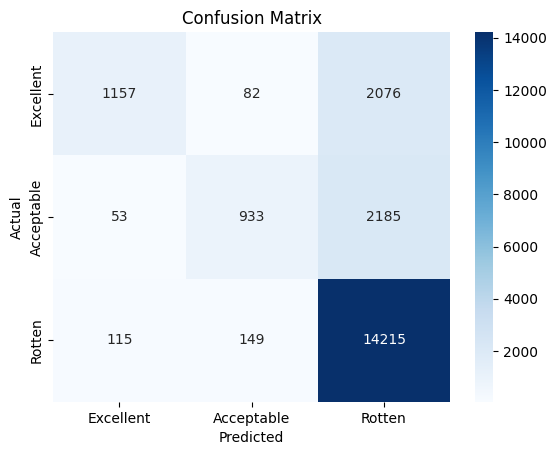

Model Accuracy of XGB: 0.78


In [ ]:
# Classification report
print("Classification Report:\n")
print(classification_report(y_test_encoded, y_pred_xgb))

# Confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_xgb)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Excellent', 'Acceptable', 'Rotten'], yticklabels=['Excellent', 'Acceptable', 'Rotten'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Accuracy score
accuracy_xgb = best_xgb.score(X_test, y_test_encoded)
print(f"Model Accuracy of XGB: {accuracy_xgb:.2f}")

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# GridSearchCV
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Classification Report after Hyperparameter Tuning:\n")
print(classification_report(y_test, y_pred_best))

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
Best Cross-Validation Accuracy: 0.9996865203761756
Classification Report after Hyperparameter Tuning:

              precision    recall  f1-score   support

       Fresh       1.00      1.00      1.00       204
     spoiled       1.00      1.00      1.00      1162

    accuracy                           1.00      1366
   macro avg       1.00      1.00      1.00      1366
weighted avg       1.00      1.00      1.00      1366



In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

#label encoder
encoder = LabelEncoder()

y_encoded = encoder.fit_transform(y)


svm_model_pca = SVC(kernel='linear', C=1, random_state=42, decision_function_shape='ovr')
svm_model_pca.fit(X_train_pca, y_train_pca)

# Plot decision boundary
xx, yy = np.meshgrid(np.linspace(X_pca[:, 0].min(), X_pca[:, 0].max(), 400),
                     np.linspace(X_pca[:, 1].min(), X_pca[:, 1].max(), 400))
Z = svm_model_pca.decision_function(np.c_[xx.ravel(), yy.ravel()])
if Z.ndim == 2 and Z.shape[1] > 1:   # Multi-class case
    Z = Z.max(axis=1)
Z = Z.reshape(xx.shape)
print(Z.shape)

plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 7), alpha=0.8, cmap='coolwarm')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_encoded, edgecolors='k', cmap='coolwarm')
plt.title('Decision Boundary (PCA Reduced Data)')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.show()

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

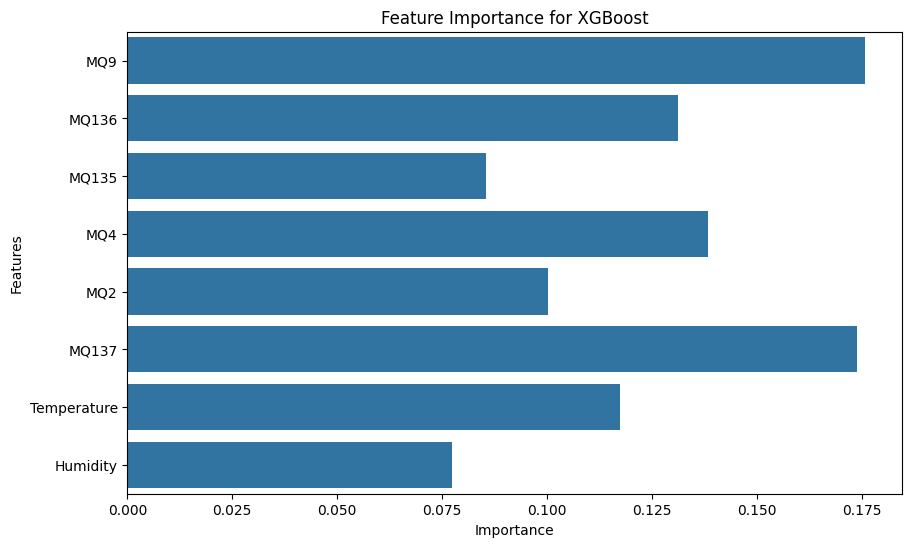

In [ ]:
# Feature Importance
feature_importances_xgb = best_xgb.feature_importances_
# feature_importances_svm = svm_model.estimators_[0].coef_[0]   # For SVM

features = X.columns

# Plot for Logistic Regresseion
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances_xgb, y=features)
plt.title("Feature Importance for XGBoost")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# # Plot  for SVM
# plt.figure(figsize=(10, 6))
# sns.barplot(x=feature_importances_svm, y=features)
# plt.title("Feature Importance for SVM")
# plt.xlabel("Importance")
# plt.ylabel("Features")
# plt.show()


# # Accuracy and Classification Report
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Model Accuracy: {accuracy:.2f}")
# target_names = [str(c) for c in encoder.classes_]
# print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names))

In [ ]:
import os
save_dir = r'/content/drive/MyDrive/Colab Notebooks'
os.makedirs(save_dir, exist_ok=True)
#SVM
file_path_1 = os.path.join(save_dir, 'svm_model.pkl')
#Logistic Regression
file_path_2 = os.path.join(save_dir, 'logistic_regression_model.pkl')

joblib.dump(svm_model, file_path_1)
print(f"\nModel saved at: {file_path_1}")

joblib.dump(lr_model, file_path_2)
print(f"\nModel saved at: {file_path_2}")


Model saved at: /content/drive/MyDrive/Colab Notebooks/svm_model.pkl

Model saved at: /content/drive/MyDrive/Colab Notebooks/logistic_regression_model.pkl


In [ ]:
joblib.dump(scaler, "/content/drive/MyDrive/Colab Notebooks/scaler.pkl")


['/content/drive/MyDrive/Colab Notebooks/scaler.pkl']